In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
%cd /content/drive/MyDrive/

/content/drive/MyDrive


In [3]:
%cp -r cat_dog_detector /content/

In [4]:
%cd /content/cat_dog_detector/

/content/cat_dog_detector


In [5]:
import os
os.mkdir("data/training/cats")
os.mkdir("data/training/dogs")
os.mkdir("data/validation/cats")
os.mkdir("data/validation/dogs")
os.mkdir("data/test/cats")
os.mkdir("data/test/dogs")

In [6]:
%cp dogs-vs-cats.zip /content/cat_dog_detector/data/

In [7]:
%cd data/
!unzip dogs-vs-cats.zip

/content/cat_dog_detector/data
Archive:  dogs-vs-cats.zip
  inflating: sampleSubmission.csv    
  inflating: test1.zip               
  inflating: train.zip               


In [ ]:
!unzip test1.zip
!unzip train.zip

In [9]:
%cd ../

/content/cat_dog_detector


In [10]:
import os
import random
import shutil
filenames=os.listdir('/content/cat_dog_detector/data/train')
split_by=int(len(filenames)*0.8)
train_files=random.sample(filenames,split_by)                  
val_files = list(set(filenames)-set(train_files))

filenamesTest = os.listdir('/content/cat_dog_detector/data/test1')
test_file = list(set(filenamesTest))

# Dividing images for Training and Validation 
for filename in test_file:
  if(filename[0:3]=='dog'):
    shutil.copyfile('/content/cat_dog_detector/data/test1/'+filename, '/content/cat_dog_detector/data/test/dogs/'+filename)
  else:
    shutil.copyfile('/content/cat_dog_detector/data/test1/'+filename, '/content/cat_dog_detector/data/test/cats/'+filename)

for filename in train_files:
    if (filename[0:3]=='dog'):
        shutil.copyfile('/content/cat_dog_detector/data/train/'+filename,'/content/cat_dog_detector/data/training/dogs/'+filename)
    else:
        shutil.copyfile('/content/cat_dog_detector/data/train/'+filename,'/content/cat_dog_detector/data/training/cats/'+filename)
        
        
for filename in val_files:
    if (filename[0:3]=='dog'):
        shutil.copyfile('/content/cat_dog_detector/data/train/'+filename,'/content/cat_dog_detector/data/validation/dogs/'+filename)
    else:
        shutil.copyfile('/content/cat_dog_detector/data/train/'+filename,'/content/cat_dog_detector/data/validation/cats/'+filename)

In [ ]:
print(len(os.listdir("data/training/cats/")))

10026


In [11]:
path = "/content/cat_dog_detector/"
training_data_dir = path + "data/training" # 10 000 * 2
training_data_cats = path + "data/training/cats/"
training_data_cats = path + "data/training/dogs/"

validation_data_dir = path + "data/validation" # 2 500 * 2
validation_data_cats = path + "data/validation/cats/"
training_data_cats = path + "data/validation/dogs/"

test_data_dir = path + "data/test"

In [12]:
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, Activation, BatchNormalization
from tensorflow.keras import optimizers
import numpy as np

In [13]:
model=Sequential()

model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(128,128,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer=optimizers.RMSprop(learning_rate=0.001), metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 126, 126, 32)      896       
_________________________________________________________________
batch_normalization (BatchNo (None, 126, 126, 32)      128       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 63, 63, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 63, 63, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 61, 61, 64)        18496     
_________________________________________________________________
batch_normalization_1 (Batch (None, 61, 61, 64)        256       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 30, 30, 64)        0

In [14]:
train_datagen = ImageDataGenerator(
    rotation_range=15,
    rescale=1./255,
    shear_range=0.1,
    zoom_range=0.2,
    horizontal_flip=True,
    width_shift_range=0.1,
    height_shift_range=0.1
)
val_datagen=ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(training_data_dir,
                                                    batch_size=20,
                                                    target_size=(128,128),
                                                    class_mode='binary')
val_generator = val_datagen.flow_from_directory(validation_data_dir,
                                                    batch_size=20,
                                                    target_size=(128,128),
                                                    class_mode='binary')

Found 20000 images belonging to 2 classes.
Found 5000 images belonging to 2 classes.


In [15]:
IMAGE_SIZE = 128
IMAGE_WIDTH, IMAGE_HEIGHT = IMAGE_SIZE, IMAGE_SIZE

In [16]:
test_data_generator = ImageDataGenerator(rescale=1./255)
test_generator = test_data_generator.flow_from_directory(
    test_data_dir,
    target_size=(IMAGE_WIDTH, IMAGE_HEIGHT),
    batch_size=1,
    class_mode="binary", 
    shuffle=False)

Found 12500 images belonging to 2 classes.


In [17]:
MODEL_FILE="model02.h5"

In [18]:
img1=load_img(os.path.join(training_data_cats,os.listdir(training_data_cats)[4]))

img_data=img_to_array(img1)

samples=np.expand_dims(img_data,0)
#Loading a single image and applying the augmentation that is applied to the whole dataset 
                                        

data_gen=ImageDataGenerator(rotation_range=15,
                            rescale=1./255,
                            shear_range=0.1,
                            zoom_range=0.2,
                            horizontal_flip=True,
                            width_shift_range=0.1,
                            height_shift_range=0.1)
 
iterator=data_gen.flow(samples,batch_size=1)

In [19]:
from keras.callbacks import EarlyStopping, ReduceLROnPlateau
from keras.callbacks import ModelCheckpoint

In [20]:
earlystop = EarlyStopping(patience=10)
checkpointer = ModelCheckpoint(MODEL_FILE,
                               verbose=1,
                               save_best_only=True, save_weights_only = True)
learning_rate_reduction = ReduceLROnPlateau(monitor='val_acc', 
                                            patience=2, 
                                            verbose=1, 
                                            factor=0.5, 
                                            min_lr=0.00001)

callbacks2 = [earlystop, checkpointer, learning_rate_reduction]

In [21]:
batch_size=20
history = model.fit(
    train_generator,
    epochs=50,
    validation_data=val_generator,
    callbacks=callbacks2
     )

Epoch 1/50
1000/1000 [==============================] - 223s 192ms/step - loss: 0.8647 - accuracy: 0.5912 - val_loss: 0.6050 - val_accuracy: 0.6932

Epoch 00001: val_loss improved from inf to 0.60503, saving model to model02.h5
Epoch 2/50
1000/1000 [==============================] - 186s 186ms/step - loss: 0.5430 - accuracy: 0.7259 - val_loss: 0.5200 - val_accuracy: 0.7434

Epoch 00002: val_loss improved from 0.60503 to 0.51998, saving model to model02.h5
Epoch 3/50
1000/1000 [==============================] - 189s 189ms/step - loss: 0.4877 - accuracy: 0.7644 - val_loss: 0.4909 - val_accuracy: 0.7824

Epoch 00003: val_loss improved from 0.51998 to 0.49095, saving model to model02.h5
Epoch 4/50
1000/1000 [==============================] - 187s 187ms/step - loss: 0.4366 - accuracy: 0.7943 - val_loss: 0.3756 - val_accuracy: 0.8406

Epoch 00004: val_loss improved from 0.49095 to 0.37564, saving model to model02.h5
Epoch 5/50
1000/1000 [==============================] - 192s 192ms/step - lo

In [22]:
%cp model02.h5 /content/drive/MyDrivepath = "/content/cat_dog_detector/"

In [23]:
from matplotlib import pyplot as plt

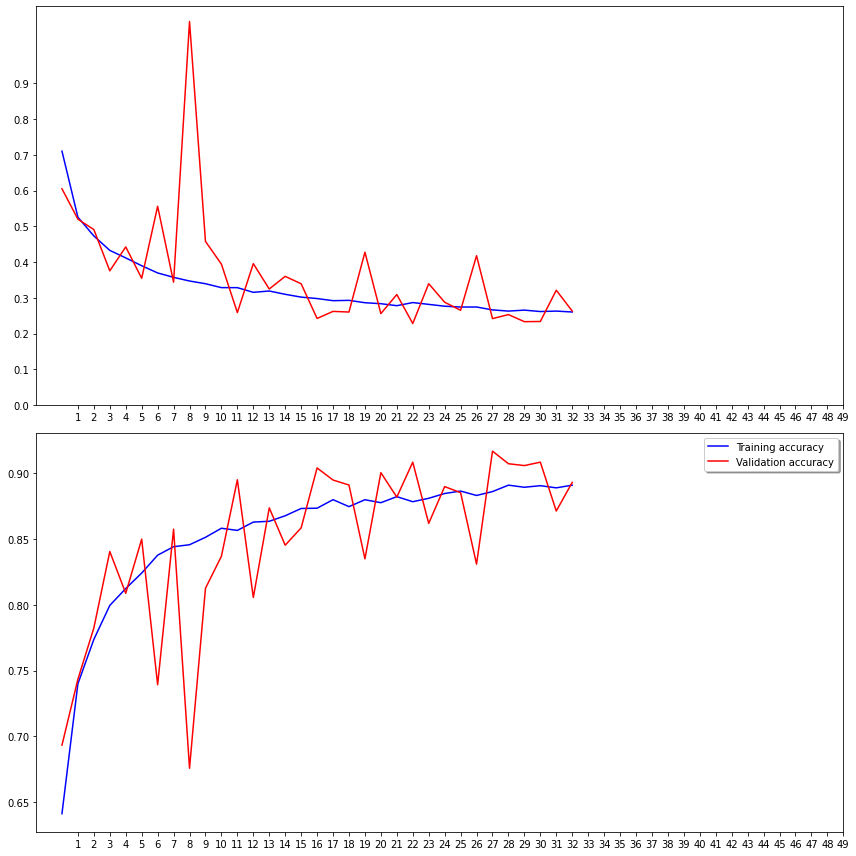

In [24]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 12))
ax1.plot(history.history['loss'], color='b', label="Training loss")
ax1.plot(history.history['val_loss'], color='r', label="validation loss")
ax1.set_xticks(np.arange(1, 50, 1))
ax1.set_yticks(np.arange(0, 1, 0.1))

ax2.plot(history.history['accuracy'], color='b', label="Training accuracy")
ax2.plot(history.history['val_accuracy'], color='r',label="Validation accuracy")
ax2.set_xticks(np.arange(1, 50, 1))

legend = plt.legend(loc='best', shadow=True)
plt.tight_layout()
plt.show()

In [25]:
TEST_SIZE = 30

In [26]:
%matplotlib inline
import matplotlib.image as mpimg

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1905: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


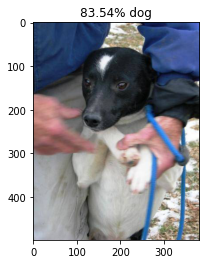

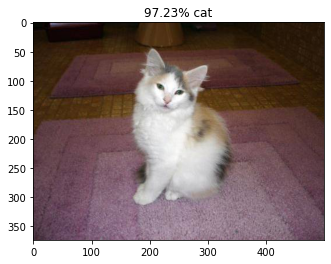

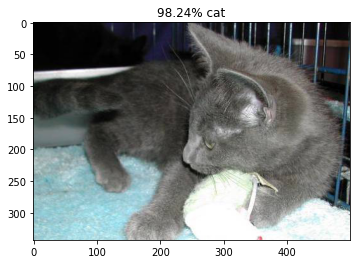

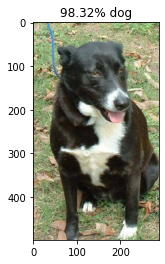

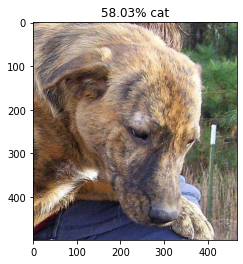

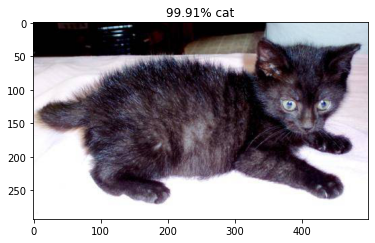

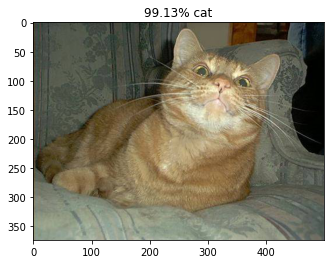

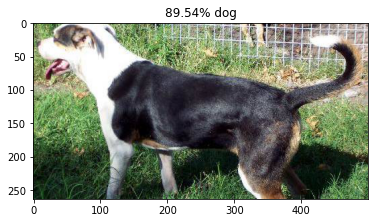

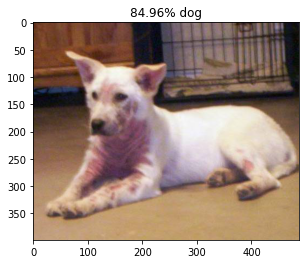

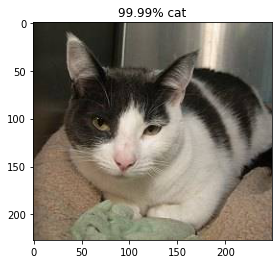

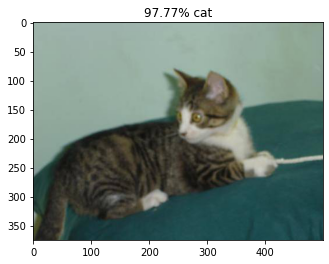

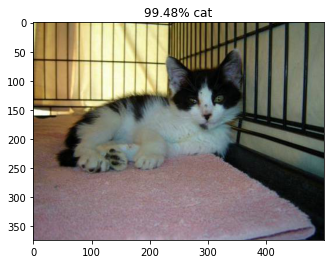

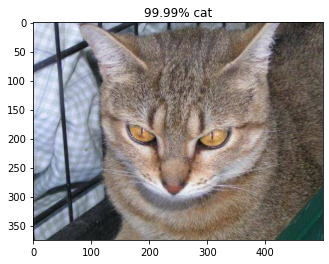

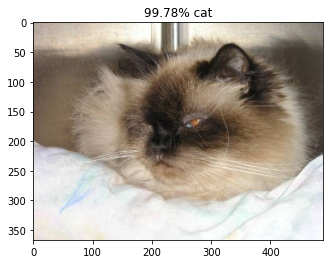

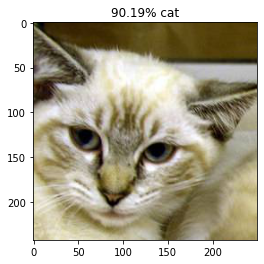

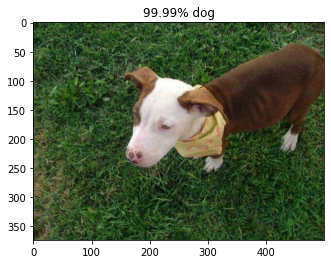

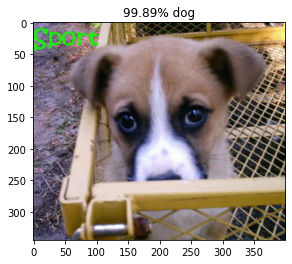

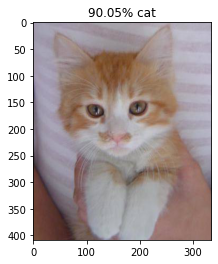

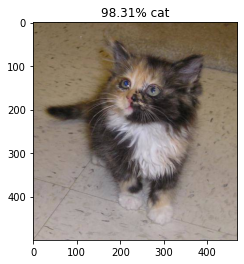

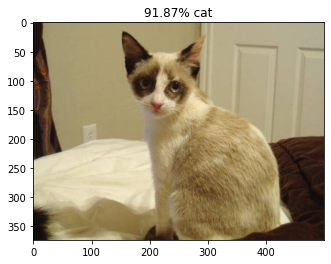

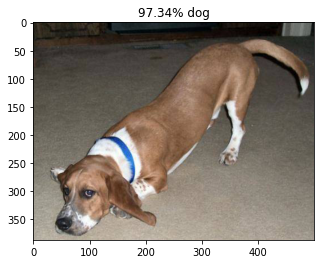

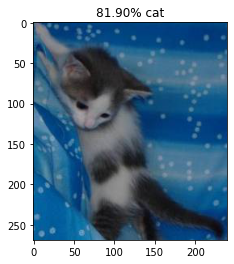

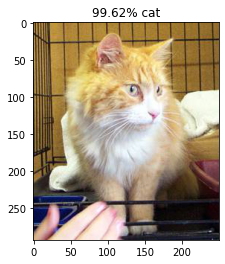

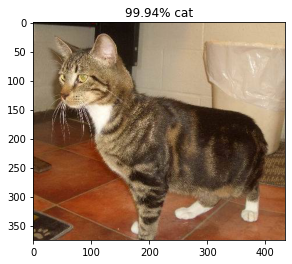

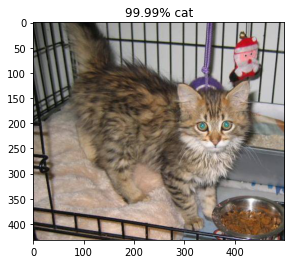

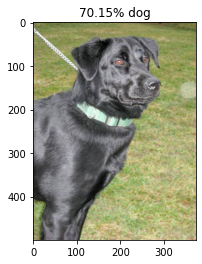

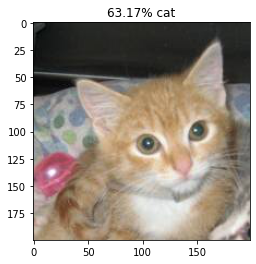

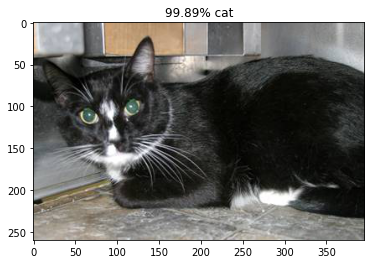

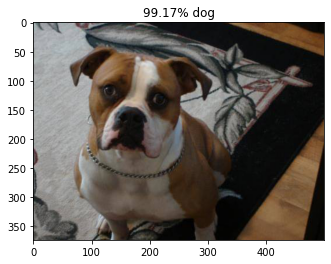

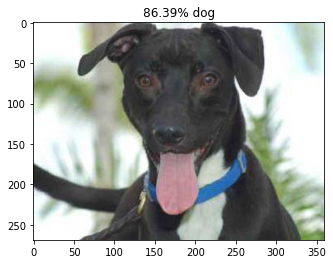

In [28]:
probabilities = model.predict_generator(test_generator, TEST_SIZE)
for index, probability in enumerate(probabilities):
    image_path = test_data_dir + "/" +test_generator.filenames[index]
    img = mpimg.imread(image_path)
    plt.imshow(img)
    if probability > 0.5:
        plt.title("%.2f" % (probability[0]*100) + "% dog")
    else:
        plt.title("%.2f" % ((1-probability[0])*100) + "% cat")
    plt.show()

In [ ]:
!apt install file -y

In [ ]:
!file /content/cat_dog_detector/data/train/cat.0.jpg

/content/cat_dog_detector/data/train/cat.0.jpg: JPEG image data, JFIF standard 1.01, aspect ratio, density 1x1, segment length 16, baseline, precision 8, 500x374, frames 3
